# Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga
df = pd.read_csv('data/departamentos_clean.csv')
df.shape

(2349, 13)

# Análisis Exploratorio de Datos (AED)

In [3]:
# Observación de los primeros datos del conjunto
df.head()

,preferencia,comuna,estacion_cercana,distancia_estacion,dormitorios,baños,estacionamientos,bodegas,superficie_total,superficie_util,precio,gastos_comunes,total
0,0,La Reina,Príncipe de Gales,412.0,3.0,2.0,1.0,1.0,118.0,98.0,820000.0,110000.0,930000.0
1,0,La Reina,Príncipe de Gales,425.0,4.0,3.0,3.0,2.0,135.0,128.0,1400000.0,180000.0,1580000.0
2,0,La Reina,Fernando Castillo Velasco,1433.0,2.0,1.0,0.0,0.0,45.0,45.0,370000.0,5000.0,375000.0
3,0,La Reina,Sin estación cercana,3000.0,3.0,3.0,3.0,1.0,190.0,140.0,1898413.0,0.0,1898413.0
4,0,La Reina,Príncipe de Gales,966.0,4.0,3.0,2.0,0.0,162.0,137.0,1500000.0,200000.0,1700000.0


In [4]:
# Tipos de datos del conjunto
df.dtypes

preferencia             int64
comuna                 object
estacion_cercana       object
distancia_estacion    float64
dormitorios           float64
baños                 float64
estacionamientos      float64
bodegas               float64
superficie_total      float64
superficie_util       float64
precio                float64
gastos_comunes        float64
total                 float64
dtype: object


### Variable Y de respuesta :

- preferencia

### Variables X predictoras :

Variables categoricas,

- comuna
- estacion_cercana

Variables cuatitativas discretas,

- dormitorios
- baños
- estacionamientos
- bodegas

Variables cuantitativas continuas,

- distancia_estacion
- superficie_total
- superficie_util
- precio
- gastos_comunes
- total

### Resumen de la variable Y de respuesta: preferencia

In [26]:
df.groupby(['preferencia'])['preferencia'].count().sort_values(ascending=False)

preferencia
0    278
1     50
Name: preferencia, dtype: int64

### Resumen de variables predictora cuantitativas

In [7]:
# Resumén estadístico de variables númericas
df[df.columns[~df.columns.isin(['preferencia'])]].describe()

,distancia_estacion,dormitorios,baños,estacionamientos,bodegas,superficie_total,superficie_util,precio,gastos_comunes,total
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2.349000e+03,2.349000e+03,2.349000e+03
mean,1275.332056,2.501916,2.320988,1.322691,0.547041,132.180549,129.173252,1.287628e+06,1.838016e+05,1.471429e+06
std,1117.592721,1.041973,1.038028,0.885574,0.690669,105.860037,786.298474,9.500667e+05,2.302229e+05,1.091731e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.900000e+05,0.000000e+00,2.450000e+05
25%,428.000000,2.000000,2.000000,1.000000,0.000000,63.000000,58.000000,6.500000e+05,7.000000e+04,7.396180e+05
50%,700.000000,2.000000,2.000000,1.000000,1.000000,98.000000,90.000000,1.000000e+06,1.280000e+05,1.130000e+06
75%,3000.000000,3.000000,3.000000,2.000000,1.000000,160.000000,140.000000,1.576648e+06,2.400000e+05,1.795766e+06
max,3000.000000,8.000000,8.000000,8.000000,16.000000,1000.000000,38000.000000,9.685124e+06,5.000000e+06,1.000000e+07


Text(0.5, 0.98, 'Diagramas de barras de dormitorios, baños y estacionamientos')

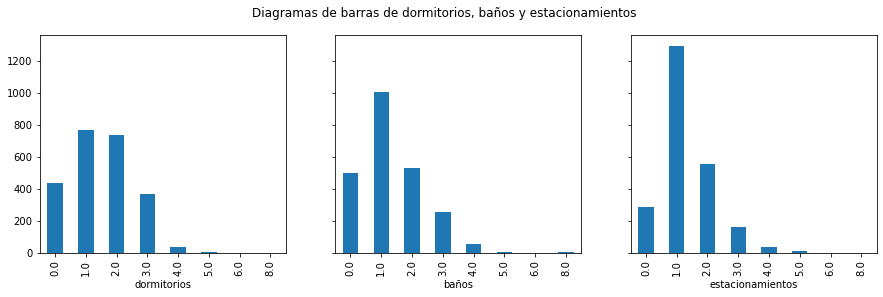

In [8]:
figure, axs = plt.subplots(1,3, figsize=(15,4), sharey=True, sharex=True)
df.groupby(['dormitorios'])['dormitorios'].count().plot(kind='bar', ax=axs[0])
df.groupby(['baños'])['baños'].count().plot(kind='bar', ax=axs[1])
df.groupby(['estacionamientos'])['estacionamientos'].count().plot(kind='bar', ax=axs[2])
plt.suptitle("Diagramas de barras de dormitorios, baños y estacionamientos")

Text(0.5, 1.0, 'Histograma de distancias a estaciones más cercanas')

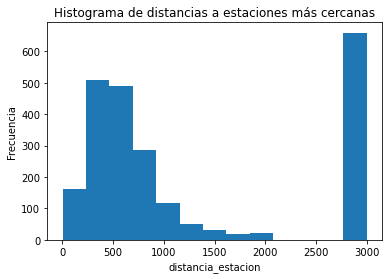

In [9]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(df["distancia_estacion"], bins = k)
plt.xlabel("distancia_estacion")
plt.ylabel("Frecuencia")
plt.title("Histograma de distancias a estaciones más cercanas")

Text(0.5, 1.0, 'Histograma de superficie util (m2)')

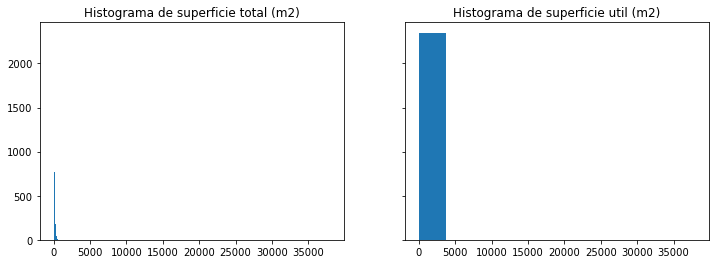

In [10]:
figure, axs = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
axs[0].hist(df["superficie_total"])
axs[0].set_title("Histograma de superficie total (m2)")
axs[1].hist(df["superficie_util"])
axs[1].set_title("Histograma de superficie util (m2)")

Text(0.5, 1.0, 'Histograma de totales en CLP')

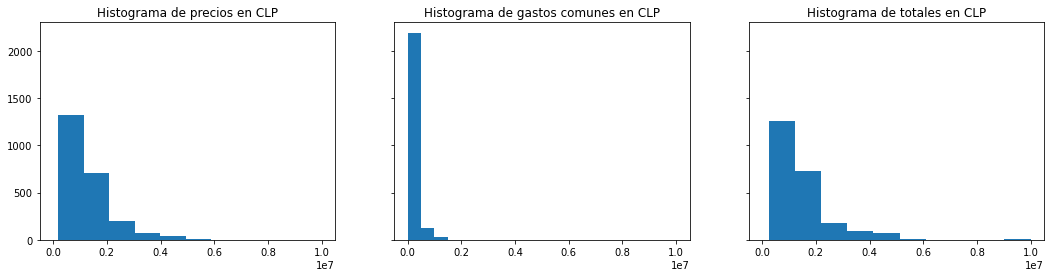

In [11]:
figure, axs = plt.subplots(1,3, figsize=(18,4), sharey=True, sharex=True)
axs[0].hist(df["precio"])
axs[0].set_title("Histograma de precios en CLP")
axs[1].hist(df["gastos_comunes"])
axs[1].set_title("Histograma de gastos comunes en CLP")
axs[2].hist(df["total"])
axs[2].set_title("Histograma de totales en CLP")

### Resumen de variables predictora categoricas

In [12]:
# Resumén estadístico de variables categoricas
df.describe(include = ['O'])

,comuna,estacion_cercana
count,2349,2349
unique,7,46
top,Las Condes,Sin estación cercana
freq,1377,659


In [13]:
# Resumen por comuna
df.groupby(['comuna'])['comuna'].count().sort_values(ascending=False)

comuna
Las Condes     1377
Providencia     427
Ñuñoa           334
Macul           140
La Reina         34
Peñalolén        23
La Florida       14
Name: comuna, dtype: int64

In [14]:
# Resumen por estción cercana, 10 primeras (de 45)
df.groupby(['estacion_cercana'])['estacion_cercana'].count().sort_values(ascending=False).head(10)

estacion_cercana
Sin estación cercana      659
Alcántara                 269
Manquehue                 160
Escuela Militar           133
El Golf                   112
Tobalaba                  109
Cristóbal Colón            88
Inés de Suárez             82
Hernando de Magallanes     71
Monseñor Eyzaguirre        56
Name: estacion_cercana, dtype: int64

## AED del subconjunto: total <= 600.000 CLP

In [15]:
# Filtrar departamentos menores o iguales a 600.000 CLP
df = df.loc[(df['total'] <= 600000)]

### Resumen de la variable Y de respuesta: preferencia

In [16]:
df.groupby(['preferencia'])['preferencia'].count().sort_values(ascending=False)

preferencia
0    278
1     50
Name: preferencia, dtype: int64

### Resumen de variables predictora cuantitativas

In [18]:
# Resumén estadístico de variables númericas
df[df.columns[~df.columns.isin(['preferencia'])]].describe()

,distancia_estacion,dormitorios,baños,estacionamientos,bodegas,superficie_total,superficie_util,precio,gastos_comunes,total
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1067.054878,1.457317,1.265244,0.646341,0.362805,46.565518,43.731982,461255.314024,48131.658537,509386.972561
std,1060.397411,0.604272,0.442137,0.497626,0.481544,12.804695,13.532417,67343.606754,33230.630642,72188.336258
min,46.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,190000.000000,0.000000,245000.000000
25%,329.750000,1.000000,1.000000,0.000000,0.000000,37.000000,35.000000,420000.000000,3772.500000,459500.000000
50%,577.000000,1.000000,1.000000,1.000000,0.000000,45.000000,42.000000,460000.000000,58000.000000,525000.000000
75%,1485.750000,2.000000,2.000000,1.000000,1.000000,55.000000,52.000000,500000.000000,70000.000000,570000.000000
max,3000.000000,3.000000,2.000000,2.000000,1.000000,84.000000,84.000000,600000.000000,120000.000000,600000.000000


Text(0.5, 0.98, 'Diagramas de barras de dormitorios, baños y estacionamientos')

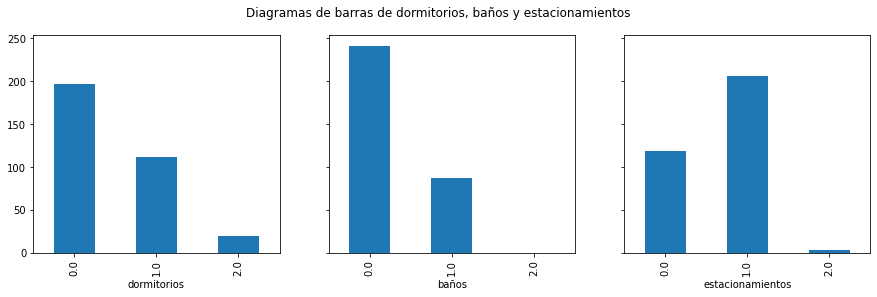

In [19]:
figure, axs = plt.subplots(1,3, figsize=(15,4), sharey=True, sharex=True)
df.groupby(['dormitorios'])['dormitorios'].count().plot(kind='bar', ax=axs[0])
df.groupby(['baños'])['baños'].count().plot(kind='bar', ax=axs[1])
df.groupby(['estacionamientos'])['estacionamientos'].count().plot(kind='bar', ax=axs[2])
plt.suptitle("Diagramas de barras de dormitorios, baños y estacionamientos")

Text(0.5, 1.0, 'Histograma de distancias a estaciones más cercanas')

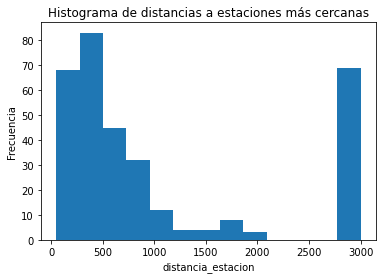

In [20]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(df["distancia_estacion"], bins = k)
plt.xlabel("distancia_estacion")
plt.ylabel("Frecuencia")
plt.title("Histograma de distancias a estaciones más cercanas")

Text(0.5, 1.0, 'Histograma de superficie util (m2)')

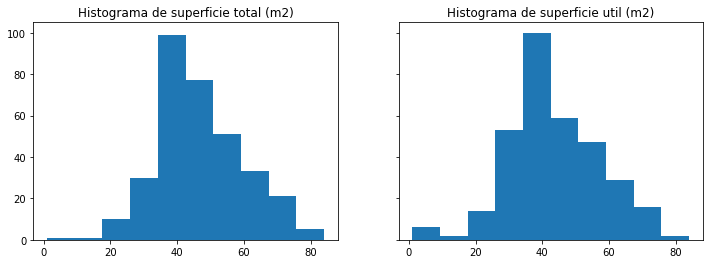

In [21]:
figure, axs = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
axs[0].hist(df["superficie_total"])
axs[0].set_title("Histograma de superficie total (m2)")
axs[1].hist(df["superficie_util"])
axs[1].set_title("Histograma de superficie util (m2)")

Text(0.5, 1.0, 'Histograma de totales en CLP')

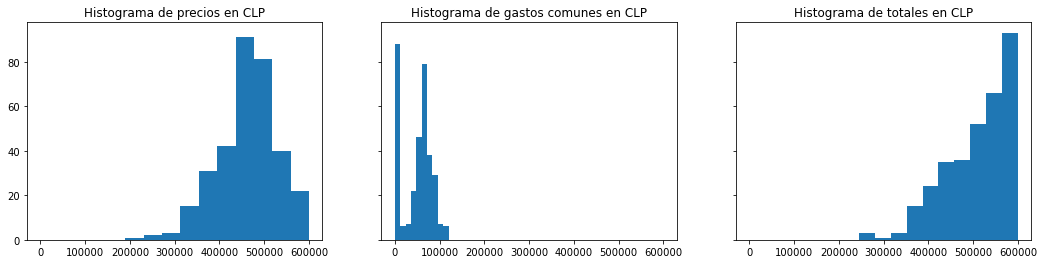

In [22]:
figure, axs = plt.subplots(1,3, figsize=(18,4), sharey=True, sharex=True)
axs[0].hist(df["precio"])
axs[0].set_title("Histograma de precios en CLP")
axs[1].hist(df["gastos_comunes"])
axs[1].set_title("Histograma de gastos comunes en CLP")
axs[2].hist(df["total"])
axs[2].set_title("Histograma de totales en CLP")

### Resumen de variables predictora categoricas

In [23]:
# Resumén estadístico de variables categoricas
df.describe(include = ['O'])

,comuna,estacion_cercana
count,328,328
unique,7,46
top,Ñuñoa,Sin estación cercana
freq,121,69


In [24]:
# Resumen por comuna
df.groupby(['comuna'])['comuna'].count().sort_values(ascending=False)

comuna
Ñuñoa          121
Macul           99
Providencia     59
Las Condes      26
La Florida      12
Peñalolén        7
La Reina         4
Name: comuna, dtype: int64

In [25]:
# Resumen por estción cercana, 10 primeras (de 45)
df.groupby(['estacion_cercana'])['estacion_cercana'].count().sort_values(ascending=False).head(10)

estacion_cercana
Sin estación cercana    69
Irarrázaval             21
Rodrigo de Araya        20
Las Torres              17
Estadio Nacional        15
Macul                   14
Chile España            14
Villa Frei              13
Quilín                  12
Monseñor Eyzaguirre     11
Name: estacion_cercana, dtype: int64